In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename="C:\\Users\\birad\OneDrive\\Documents\\Heart_attack_Dataset_Kaggle_Notepad.csv"
df = pd.read_csv(filename)

In [3]:
def Outliner_info(quart_v):
    print("----------------for",quart_v,"-------------------")
    Q1,Q2,Q3 = df[quart_v].quantile([0.25,0.50,0.75]) 
    quartiles = [Q1,Q2,Q3]
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5*IQR
    upper_b = Q3 + 1.5*IQR
    print(["Q1","Q2  ","Q3 ","IQR","lower_b  ","upper_b"])
    print([Q1,Q2,Q3,IQR,lower_b,upper_b])
    #value lesser than lower_b and values greater than upper_b are considered as outliners
    lower_index = np.where(df[quart_v] <= lower_b)
    upper_index = np.where(df[quart_v] >= upper_b)
    print("index for lower outliners: ", lower_index)
    print("index for upper outliners: ",upper_index) 
    mean = df[quart_v].mean()
    print("mean of ",quart_v,"=",mean)
    val_list = []
    for val in df[quart_v]:
        if val >= upper_b:
            val_list.append(val)
    print("val_list = ",val_list)  

In [4]:
df1 = df.drop([85], axis = 0, inplace = False) 
df1.at[28,"chol"]= 369 
df1.at[96,"chol"]= 369 
df1.at[220,"chol"]= 369 
df1.at[246,"chol"]= 369

In [5]:
df1.drop([248,223], axis = 0, inplace = True)

In [6]:
temp_list = [  8, 101, 110, 152, 195, 203, 228, 241, 260, 266, 292]
for i in temp_list:
    df1.at[i,"trtbps"]=170

In [7]:
df1.at[272,"thalachh"] = 84

In [8]:
temp_list1 = [101, 204, 220, 221, 250, 291, 295]
for j in temp_list1:
    df1.at[j,"oldpeak"]= 4.0

In [9]:
temp_list2 = [ 92, 158, 163, 164, 251]
for k in temp_list2:
    df1.at[k,"caa"]= 3

In [10]:
df1.at[48,"thall"]=1
df1.at[281,"thall"]=1

In [11]:
duplicate_rows = df1[df1.duplicated()]
duplicate_rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,3,2,1


In [12]:
df1.duplicated().sum()
df1 = df1.drop_duplicates()

Random Forest

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [14]:
# Split the data into features and labels
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#train RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=42) #n_estimators: 100, max_depth = 2
rf1.fit(X_train, y_train)

#predict
y_pred_1 = rf1.predict(X_test)


#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------RF Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------RF Metrics----------

Accuracy: 0.8833333333333333
Precision: 0.8918918918918919
Recall: 0.9166666666666666
F1 Score: 0.9041095890410958

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.89      0.92      0.90        36

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



[[20  4]
 [ 3 33]]


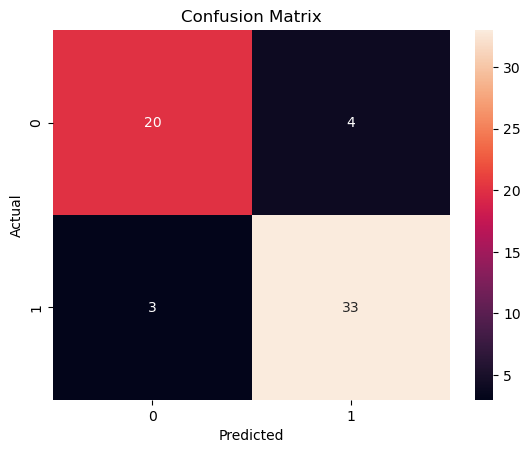

In [16]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=1000, random_state=42)

rf2.fit(X_train, y_train)

#predict
y_pred = rf2.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------RF Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)


----------RF Metrics----------

Accuracy: 0.95
Precision: 0.9459459459459459
Recall: 0.9722222222222222
F1 Score: 0.9589041095890412

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.95      0.97      0.96        36

    accuracy                           0.95        60
   macro avg       0.95      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60



[[22  2]
 [ 1 35]]


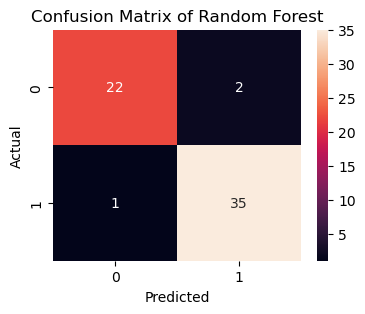

In [18]:


#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
axes, fig = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix of Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



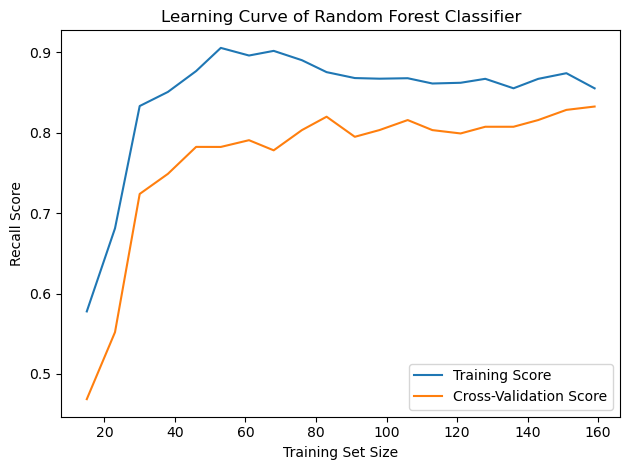

In [26]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(rf2, X_train, y_train, cv=3, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,20))
#train_sizes: the proportion of the training set to include in the learning curve.
#train_sizes=np.linspace(0.1,1.0,4) means the training set size will be 10%, 40%, 70%, and 100% of the training set.
#train_scores: the scores for each training subset
#test_scores: the scores for each testing subset

#plot the learning curve
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of Random Forest Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Recall Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf1, X_train, y_train, cv=10, scoring="f1") 
for i in range(10):
    print("Fold", i, ":", scores[i])
print("\nMean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Variance:", scores.var())

Fold 0 : 0.7857142857142856
Fold 1 : 0.8
Fold 2 : 0.8333333333333333
Fold 3 : 0.8666666666666666
Fold 4 : 0.7407407407407408
Fold 5 : 0.8333333333333333
Fold 6 : 0.7857142857142856
Fold 7 : 0.8695652173913043
Fold 8 : 0.8181818181818182
Fold 9 : 0.6923076923076924

Mean: 0.8025557373383461
Standard Deviation: 0.05223859007064939
Variance: 0.0027288702925693494


In [21]:
#PRC

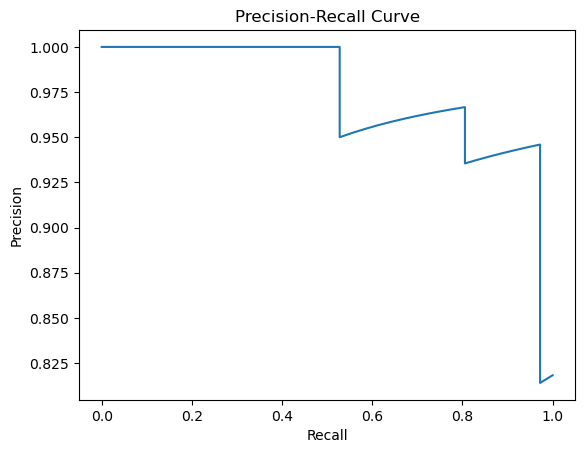

In [22]:
from sklearn.metrics import precision_recall_curve


# Get the predicted probabilities for the test data
y_proba =rf2.predict_proba(X_test)[:,1]

# Calculate the precision-recall curve values
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [23]:
#ROC

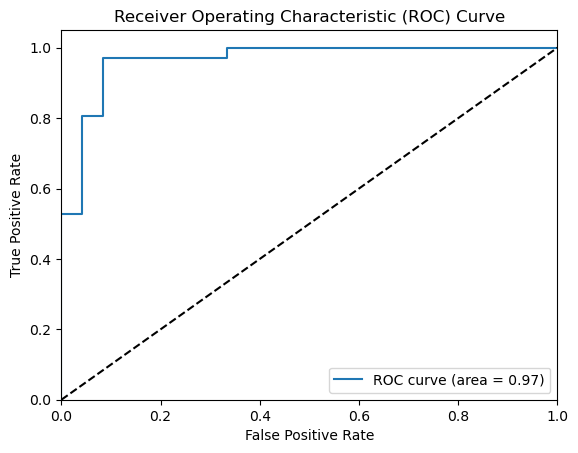

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load your data into X_test and y_test
# Assuming your Gradient Boosting model is named 'best_gb'

# Get the predicted probabilities for the test data
y_proba = rf2.predict_proba(X_test)[:,1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Feature ranking:
1. feature 2 (0.206802)
2. feature 11 (0.145732)
3. feature 12 (0.144954)
4. feature 9 (0.115641)
5. feature 7 (0.108672)
6. feature 8 (0.108330)
7. feature 10 (0.071160)
8. feature 0 (0.051947)
9. feature 1 (0.017815)
10. feature 4 (0.015458)
11. feature 3 (0.007790)
12. feature 6 (0.005442)
13. feature 5 (0.000258)


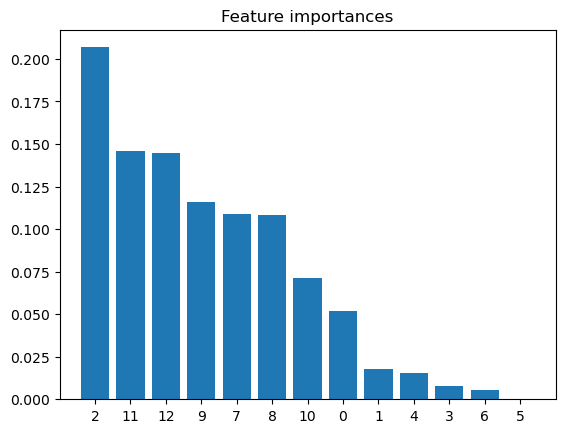

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Train a random forest classifier (rf2) on your data

# Get feature importances
importances = rf2.feature_importances_

# Get the indices of the features in descending order of importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


Feature ranking:
1. feature 2 (0.206802): cp
2. feature 11 (0.145732): caa
3. feature 12 (0.144954): thall
4. feature 9 (0.115641): oldpeak
5. feature 7 (0.108672): thalachh
6. feature 8 (0.108330): exng
7. feature 10 (0.071160): slp
8. feature 0 (0.051947): age
9. feature 1 (0.017815): sex
10. feature 4 (0.015458): chol
11. feature 3 (0.007790): trtbps
12. feature 6 (0.005442): restecg
13. feature 5 (0.000258): fbs


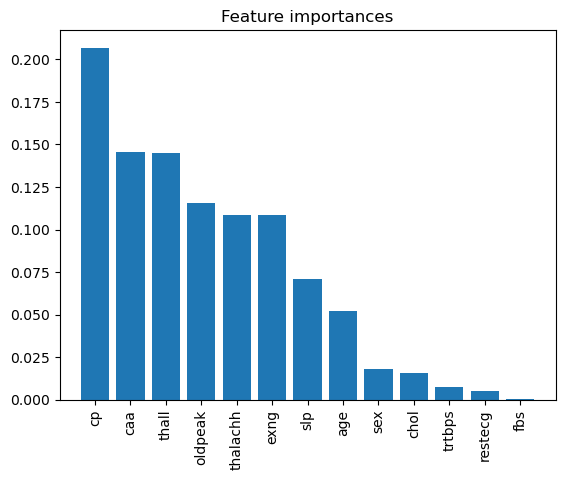

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Train a random forest classifier (rf2) on your data

# Get feature importances
importances = rf2.feature_importances_

# Get the indices of the features in descending order of importance
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = np.array(['age', 'sex', 'cp','trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa','thall'])

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()
